In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import plotnine as pn

# import katzplotkinpy as kpp

In [2]:
epsilon = 0.15
k = 2
alpha = 0
m = 30

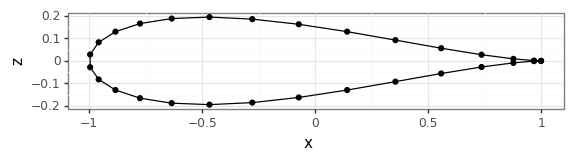

<ggplot: (8757579699821)>

In [22]:
# Parameters
l = 1.0  # Half chord of the airfoil
a = 2 * l * np.power(epsilon + 1, k - 1) / np.power(2, k)  # Eq. 6.65
theta = np.linspace(0, 2 * np.pi, m)
# tau = np.pi * (2 - k)

# Eq 6.74a and 6.74b
r1 = np.sqrt(np.power(a * np.cos(theta) - a, 2) + np.power(a * np.sin(theta), 2))
r2 = np.sqrt(
    np.power(a * np.cos(theta) - epsilon * a, 2) + np.power(a * np.sin(theta), 2)
)
# theta1 = np.arctan(a * np.sin(theta) / (a * np.cos(theta) - a)) + np.pi
theta1 = np.arctan2(a * np.sin(theta), a * np.cos(theta) - a)
theta2 = np.arctan2(a * np.sin(theta), a * np.cos(theta) - epsilon * a)

x = (
    np.power(r1, k)
    / np.power(r2, k - 1)
    * (
        np.cos(k * theta1) * np.cos((k - 1) * theta2)
        + np.sin(k * theta1) * np.sin((k - 1) * theta2)
    ) + l
)
z = (
    np.power(r1, k)
    / np.power(r2, k - 1)
    * (
        np.sin(k * theta1) * np.cos((k - 1) * theta2)
        - np.cos(k * theta1) * np.sin((k - 1) * theta2)
    )
)

afgen = pd.DataFrame({"x": x, "z": z})
(
    pn.ggplot(afgen, pn.aes("x", "z"))
    + pn.geom_point()
    + pn.geom_path()
    + pn.coord_fixed()
    + pn.theme_bw()
)

/tmp/ipykernel_7920/2751116683.py:50: RuntimeWarning: divide by zero encountered in divide
/tmp/ipykernel_7920/2751116683.py:50: RuntimeWarning: invalid value encountered in multiply
/tmp/ipykernel_7920/2751116683.py:55: RuntimeWarning: divide by zero encountered in divide
/tmp/ipykernel_7920/2751116683.py:55: RuntimeWarning: invalid value encountered in multiply
/home/alwin/.local/lib/python3.8/site-packages/plotnine/layer.py:412: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
/home/alwin/.local/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


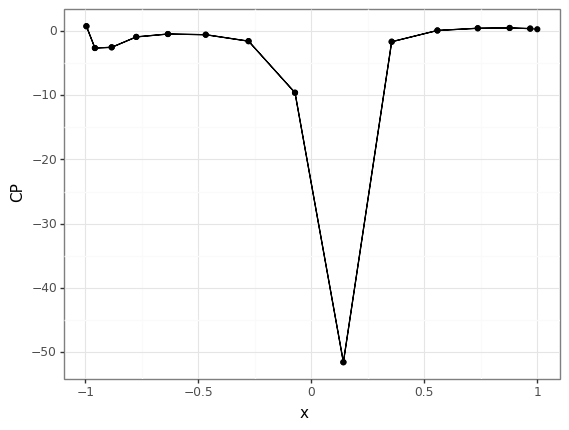

<ggplot: (8757577862729)>

In [30]:
# Parameters
l = 1.0  # Half chord of the airfoil
a = 2 * l * np.power(epsilon + 1, k - 1) / np.power(2, k)  # Eq. 6.65
theta = np.linspace(0, 2 * np.pi, m)
# tau = np.pi * (2 - k)

# Eq 6.74a and 6.74b
r1 = np.sqrt(np.power(a * np.cos(theta) - a, 2) + np.power(a * np.sin(theta), 2))
r2 = np.sqrt(
    np.power(a * np.cos(theta) - epsilon * a, 2) + np.power(a * np.sin(theta), 2)
)
theta1 = np.arctan2(a * np.sin(theta), a * np.cos(theta) - a)
theta2 = np.arctan2(a * np.sin(theta), a * np.cos(theta) - epsilon * a)

x = (
    np.power(r1, k)
    / np.power(r2, k - 1)
    * (
        np.cos(k * theta1) * np.cos((k - 1) * theta2)
        + np.sin(k * theta1) * np.sin((k - 1) * theta2)
    )
    + l
)
z = (
    np.power(r1, k)
    / np.power(r2, k - 1)
    * (
        np.sin(k * theta1) * np.cos((k - 1) * theta2)
        - np.cos(k * theta1) * np.sin((k - 1) * theta2)
    )
)

Qinf = 1
alpha = np.deg2rad(alpha)

# fmt:off
A = (
    np.cos((k - 1) * theta1) * np.cos(k * theta2)
    + np.sin((k - 1) * theta1) * np.sin(k * theta2)
)
B = (
    np.sin((k - 1) * theta1) * np.cos(k * theta2)
    - np.cos((k - 1) * theta1) * np.sin(k * theta2)
)

D0 = a * (1 - k + k * epsilon)
D1 = A * (a * np.cos(theta) - D0) + B * (a * np.sin(theta))
D2 = A * (a * np.sin(theta)) + B * (a * np.cos(theta) - D0)

u = (
    2 * Qinf * np.power(r2, k) / np.power(r1, k - 1)
    * (np.sin(alpha) - np.sin(alpha - theta)) / (np.power(D1, 2) + np.power(D2, 2))
    * (D1 * np.sin(theta) + D2 * np.cos(theta))
)
w = (
    -2 * Qinf * np.power(r2, k) / np.power(r1, k - 1)
    * (np.sin(alpha) - np.sin(alpha - theta)) / (np.power(D1, 2) + np.power(D2, 2))
    * (D1 * np.cos(theta) - D2 * np.sin(theta))
)
# fmt:on

CP = 1 - (np.power(u, 2) + np.power(w, 2)) / np.power(Qinf, 2)

cp_df = pd.DataFrame({"x": x, "cp": CP})
(
    pn.ggplot(cp_df, pn.aes("x", "CP"))
    + pn.geom_point()
    + pn.geom_path()
    + pn.theme_bw()
)